In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [3]:
label = [[-1,7,-1,-1,2,-1,1,-1,-1],
         [6,-1,3,-1,-1,-1,-1,-1,-1],
         [2,-1,-1,3,-1,-1,5,-1,-1],
         [-1,-1,-1,-1,3,-1,-1,6,-1],
         [-1,6,4,7,-1,-1,-1,8,-1],
         [-1,5,-1,-1,9,-1,-1,4,-1],
         [-1,4,-1,-1,7,-1,9, -1,-1],
         [-1,2,-1,-1,-1,8,-1,5,-1],
         [-1,-1,-1,-1,-1,-1,-1,-1,-1]]
label

[[-1, 7, -1, -1, 2, -1, 1, -1, -1],
 [6, -1, 3, -1, -1, -1, -1, -1, -1],
 [2, -1, -1, 3, -1, -1, 5, -1, -1],
 [-1, -1, -1, -1, 3, -1, -1, 6, -1],
 [-1, 6, 4, 7, -1, -1, -1, 8, -1],
 [-1, 5, -1, -1, 9, -1, -1, 4, -1],
 [-1, 4, -1, -1, 7, -1, 9, -1, -1],
 [-1, 2, -1, -1, -1, 8, -1, 5, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1]]

In [21]:
# build the sudoku based on the label:
def create_grid(img_size=100, narrow = 0, wide = 1):
    img = np.zeros([img_size, img_size])

    # create grid:
    for i in range(10):
        ind = min(int(i*img_size/9), img_size-1)
        if i%3==0:
            ind = np.arange(ind-wide, ind+wide+1)
        else:
            ind = np.arange(ind-narrow, ind+narrow+1)
        ind = np.clip(ind, 0, img_size-1)
        # print(i, ind)
        img[ind, :] = 255
        img[:, ind] = 255
    return img
# plt.imshow(img)

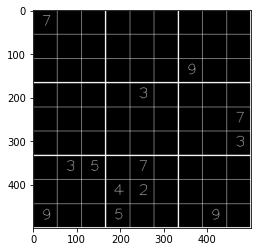

In [24]:
# first do it with printed numbers:
img_size=500
img = create_grid(img_size)
for i in range(9):
    for j in range(9):
        ind_x = min(int(i*img_size/9), img_size-1) + int(img_size/9*1/3)
        ind_y = min(int(j*img_size/9), img_size-1) + int(img_size/9*2/3)
        if label[j][i]!=-1:
            cv2.putText(img, str(label[j][i]), (ind_x, ind_y), 1, img_size/200, (255, 255, 255))
plt.imshow(img, cmap='gray')

In [25]:
# now with digits from mnist:
import torch
from torchvision import datasets, transforms
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
mnist = datasets.MNIST('../data')
# train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
mnist[4][0]

[[-1, -1, 8, 3, 9, -1, -1, -1, 5],
 [-1, -1, 3, -1, -1, -1, -1, -1, 7],
 [1, -1, -1, -1, -1, -1, -1, -1, 2],
 [3, -1, 6, -1, -1, -1, -1, -1, 9],
 [-1, -1, -1, -1, -1, 1, -1, -1, 1],
 [4, 4, -1, -1, -1, -1, 6, -1, -1],
 [9, 1, -1, 5, -1, -1, -1, 1, -1],
 [-1, -1, 1, -1, -1, -1, 5, -1, -1],
 [-1, -1, 1, 9, -1, -1, 5, -1, -1]]

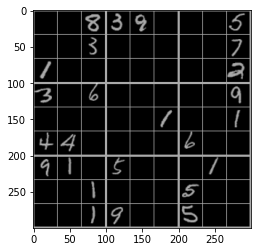

In [34]:
img_size = 300
sparsity = random.randint(1, 5)
cell_size = int(img_size/9)
#TODO: add "augmentations":
# digits location - add random shift
# digits size - add random factor size
# max_shift_size = cell_size//2
img = create_grid(img_size)
label = []
for i in range(9): #rows
    label.append([])
    for j in range(9): #cols
        ind_x = min(int(j*cell_size), img_size-1) # + (random.random()*2-1)*max_shift_size)
        ind_y = min(int(i*cell_size), img_size-1)
        num_ind = random.randint(0, len(mnist)) # choose random instance from MNIST
        if not random.randint(0, sparsity) and mnist[num_ind][1]: #chances are 1/sparcity for cell to occupy. also we don't want any zeros
            label[i].append(mnist[num_ind][1])
            img[ind_y:ind_y+cell_size, ind_x:ind_x+cell_size] += np.array(mnist[num_ind][0].resize((cell_size, cell_size)))
        else:
            label[i].append(-1)
plt.imshow(img, cmap='gray')
label

array([[0, 4, 0, 8, 9, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 9, 0, 9, 0, 0, 1, 9, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 7, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 2],
       [8, 0, 0, 2, 0, 0, 0, 0, 5],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [9, 0, 4, 0, 4, 0, 0, 0, 0]])

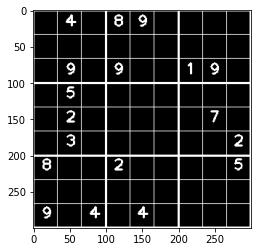

In [58]:
# combine printed and hand-written digits:
img_size = 300
sparsity = random.randint(1, 5)

#TODO: add "augmentations":
# digits location - add random shift
# digits size - add random factor size
# max_shift_size = cell_size//2
def create_num_grid(img_size, sparsity, combine_mnist=0):
    cell_size = int(img_size/9)
    img = create_grid(img_size)
    label = []
    for i in range(9): #rows
        label.append([])
        for j in range(9): #cols
            ind_x = min(int(j*cell_size), img_size-1) # + (random.random()*2-1)*max_shift_size)
            ind_y = min(int(i*cell_size), img_size-1)
            num_ind = random.randint(0, len(mnist)) # choose random instance from MNIST
            if not random.randint(0, sparsity) and mnist[num_ind][1]: #chances are 1/sparcity for cell to occupy. also we don't want any zeros
                label[i].append(mnist[num_ind][1])
                if random.randint(0, combine_mnist):
                    img[ind_y:ind_y+cell_size, ind_x:ind_x+cell_size] += np.array(mnist[num_ind][0].resize((cell_size, cell_size)))
                else:
                    cv2.putText(img, str(mnist[num_ind][1]),
                            (ind_x + int(cell_size*1/3), ind_y+int(cell_size*2/3)),
                            1, img_size/200, (255, 255, 0), 2)
            else:
                label[i].append(0)
    return img, np.array(label)

img, label = create_num_grid(img_size, sparsity, combine_mnist=0)
plt.imshow(img, cmap='gray')
label

In [80]:
output_path = r"data/GridNums/printed/"
for i in range(5):
    img, label = create_num_grid(img_size, sparsity, combine_mnist=0)
    cv2.imwrite(output_path + 'grids/{:03d}.png'.format(i), img)
    cv2.imwrite(output_path + 'nums/{:03d}.png'.format(i), label)

In [79]:
!pwd

/home/yuval/Projects/soduko


In [73]:
output_path + 'grids/{:03d}.png'.format(i)

'data/GridNums/printed/grids/004.png'

In [78]:
cv2.imwrite(output_path + 'grids/{:03d}.png'.format(i), img)

False